<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Hypothesis__testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hypothesis Tests
* One of the purposes of hypotheis testing id to determone whether a sample statistic is close to or far away from a hypothesized value.
* z-score=(sample_stat-hypothesized_value)/std.error
* z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic
* A hypothesis is a statement about an unknown population parameter.
  * Null hypothesis, the existing status quo. H0
  * Alternative hypotesis, the challeger HA
* Hypothesis tests check whether the **sample statistic** lies in the tails of the null distribution
* p-value represents the probability of obtaining a result under the null hypothesis


In [1]:
import pandas as pd
from scipy.stats import norm
import numpy as np

In [2]:
late=pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/887ec4bc2bcfd4195e7d3ad113168555f36d3afa/late_shipments.feather')

In [3]:
late.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


State the hypothesis.
1. H0 : The number of late shipments is 6%
2. HA : The number of late shipments exceeds 6%

</p> We use the boot strap method to determine the std_error for the test statistic. This can be done for any test statistic. We then calculate the z_score and the p_value from the z_score.</p>

In [4]:
# Calculate the sample statistic
sample_stat=(late.late=='Yes').mean()
sample_stat

0.061

In [5]:
# now create a boot strap distribution
late_prop=np.empty(1000)
for i in range(1000):
  boot=late.sample(frac=1,replace=True)
  stat=(boot.late=='Yes').mean()
  late_prop[i]=stat


In [6]:
std_error=late_prop.std(ddof=1)
std_error

0.007550550629908711

In [7]:
# Calculate the z score
z_score=(sample_stat-0.06)/std_error

In [8]:
# Calculate the p-value
1-norm.cdf(z_score)

0.447317873165203

* large P-value means we fail to reject the null hypothesis.



---

2 types of error

---
1. Chosen H0, Actual HA then false negative (type 2 error)
2. Chosen HA, Actual H0 then false positive (type I error)



## Hypothesis test using t stat and bootstrap
* Using a t-statistic can be computationally less intensive and give similar results as doing a boot straping for the hypothesis test.
* We want to test whether heavier packages are late and if this is statistically significant.



* H0-: No diff in mean weight between packages that are late and on time
* HA-: Packages that are late are heavier
* Alpha-: 0.05


In [17]:
# First lets see if there is a difference in weight for late packages
means=late.groupby('late')['weight_kilograms'].mean()


In [18]:
# Calculating the test statistic
test_statistic=means[1]-means[0]

In [19]:
# Performing bootstrap to calculate std error
rep=np.empty(1000)
for i in range(1000):
  samp=late.sample(frac=1,replace=True)
  means=samp.groupby('late')['weight_kilograms'].mean()
  rep[i]=means[1]-means[0]

In [20]:
std_error=np.std(rep)

In [21]:
z_score=(test_statistic-0)/std_error
z_score

2.387105237576427

In [22]:
from scipy.stats import norm
p_val=1-norm.cdf(z_score,loc=0,scale=1)
p_val

0.008490814713556505

In [23]:
alpha=0.05
p_val<=alpha

True

* In this case the p value is less than the alpha so we reject the null hypothesis
* In other words late packages tend to be heavier packages

### Use t-statistic for the same result

In [24]:
count=late.late.value_counts()

In [25]:
n_yes=late.loc[late.late=='Yes','id'].count()
n_no=late.loc[late.late=='No','id'].count()
print(n_yes,n_no)

61 939


In [26]:
std_yes=late.loc[late.late=='Yes','weight_kilograms'].std()
std_no=late.loc[late.late=='No','weight_kilograms'].std()
print(std_yes,std_no)

2544.688210903328 3154.0395070841696


In [27]:
denominator=np.sqrt((std_yes**2/n_yes)+(std_no**2/n_no))
denominator

341.68543274794337

In [28]:
tstat=test_statistic/denominator
tstat

2.3936661778766433

In [29]:
from scipy.stats import t
pval=1-t.cdf(tstat,df=n_yes+n_no-2)

In [30]:
pval<=alpha

True

In [31]:
pval

0.008432382146249529

#### Running a similar test for salary
* H0: Difference in salaries is 0
* HA: the salroes of folks who started as kids are higher

In [32]:
stack=pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather')

In [33]:
stack.sample(5)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
153,3098.0,I am a developer by profession,Yes,21.0,15.0,adult,Monthly,2500.0,30000.0,United States,...,Too long,No,Mathematics or statistics,Django;Express;Flask;Gatsby;React.js,None,Just as welcome now as I felt last year,40.0,6.0,4.0,Under 30
684,16232.0,I am a developer by profession,Yes,29.0,20.0,adult,Monthly,650000.0,61140.0,Iceland,...,Appropriate in length,No,Mathematics or statistics,Django;Flask;Spring,Django;Flask;jQuery,Just as welcome now as I felt last year,40.0,8.0,2.0,Under 30
613,15015.0,I am a developer by profession,Yes,26.0,19.0,adult,Monthly,200.0,2592.0,France,...,Appropriate in length,None,"A health science (such as nursing, pharmacy, r...",React.js,React.js,Just as welcome now as I felt last year,90.0,7.0,4.0,Under 30
549,13494.0,"I am not primarily a developer, but I write co...",Yes,23.0,14.0,adult,Monthly,800.0,10380.0,Italy,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django,Angular;Django;jQuery,Just as welcome now as I felt last year,18.0,6.0,3.0,Under 30
1860,50751.0,I am a developer by profession,Yes,24.0,15.0,adult,Yearly,22000.0,23782.0,Austria,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",None,None,Just as welcome now as I felt last year,4.0,7.0,2.0,Under 30


In [34]:
# Getting the mean salary by child_begin and adult begin coders
means=stack.groupby('age_first_code_cut')['converted_comp'].mean()

In [35]:
test_stat=means[1]-means[0]

In [36]:
counts=stack.groupby('age_first_code_cut')['converted_comp'].count()

In [37]:
n_adult=counts[0]
n_child=counts[1]

In [38]:
std=stack.groupby('age_first_code_cut')['converted_comp'].std()

In [39]:
std_a=std[0]
std_c=std[1]

In [40]:
denominator=np.sqrt(std_a**2/n_adult+std_c**2/n_child)

In [41]:
t_stat=test_stat/denominator
t_stat

1.8699313316221844

In [42]:
1-t.cdf(t_stat,df=n_adult+n_child-2)

0.030811302165157595

In [ ]:
#!pip install pingouin

In [44]:
import pingouin

In [45]:
stack.groupby('job_sat')['converted_comp'].mean()

job_sat
Very dissatisfied        127539.679245
Slightly dissatisfied     96643.324561
Neither                  110593.980100
Slightly satisfied        96084.992647
Very satisfied           147281.484642
Name: converted_comp, dtype: float64

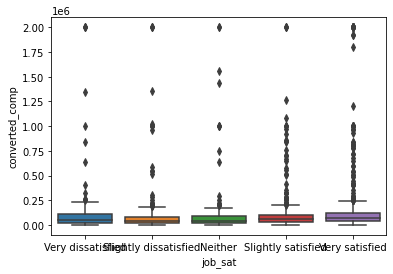

In [46]:
import seaborn as sns
sns.boxplot(x='job_sat',y='converted_comp',data=stack)


In [47]:
pingouin.anova(data=stack,dv='converted_comp',between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


> Both the boxplot and the anova test show that there is some relationship between *job satisfaction* and *compensation.* The p_value *p-unc* shows that at a 95% CI level we can say that job satisfaction affects compensation. From the box plot it is the Very satisfied category driving this difference

In [48]:
pingouin.pairwise_tests(data=stack,dv='converted_comp',between='job_sat',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


> Looks like Slightly satisfied and Very satisfied have a statistically significant relationship and so do Very satisfied and Slightly dissatisfied. All other pairwise relation ships are not statistically significant